<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="600" height="200">

# EDA ON IMDB Movies Rating





## Table of Contents

1. [Problem Statement](#section1) <br>
2. [Importing Packages](#section2) <br>
3. [Loading Dataset](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
4. [Pandas Profiling before Data Preprocessing](#section4)<br>
5. [Data Cleaning/Preprocessing](#section5)<br>
  - 5.1 [Column standardization](#section501)<br>
  - 5.2 [Remove duplicate records](#section502)<br>
  - 5.3 [Handling missing values](#section503)<br>
6. [Pandas Profiling after Data Preprocessing](#section6)<br>
7. [Exploratory Data Analysis](#section7)<br>
  - 7.1 [Feature Based Analysis](#section701)
    - 7.1.1 [What are the top 10 car brands on sale?](#section70101)
    - 7.1.2 [What is the sale distribution based on engine type?](#section70102)
    - 7.1.3 [What is the sale distribution based on drive type?](#section70103)
    - 7.1.4 [What is the sale distribution based on body type?](#section70104)
    - 7.1.5 [What is the car sale based on registration?](#section70105)
  - 7.2 [Price Based Analysis?](#section702)
    - 7.2.1 [What are car brands on sale based on avg price?](#section70201)
    - 7.2.2 [How price varies based on body type?](#section70202)
    - 7.2.3 [How price varies based on engine type?](#section70203)
    - 7.2.4 [How price varies based on drive type??](#section70204)
  - 7.3 [Mileage Based Analysis](#section703)
    - 7.3.1 [What is sale distribution based on mileage?](#section70301)
    - 7.3.2 [How price varies based on mileage?](#section70302)
    - 7.3.3 [How mileage varies based on body type?](#section70303)
    - 7.3.4 [How mileage varies based on engine type?](#section70304)
    - 7.3.5 [How mileage varies based on drive type?](#section70305)
  - 7.4 [Year Based Analysis](#section704)
    - 7.4.1 [What is the car sale based on year of production?](#section70401)
    - 7.4.2 [How is price variation over years?](#section70402)
  - 7.5 [Multivariant Based Analysis](#section705)
    - 7.5.1 [What is the registered car sale distribution based on body type?](#section70501)
    - 7.5.2 [What is the trend of ukraine registered cars?](#section70502)
    - 7.5.3 [What is the price variance over years based on body type?](#section70503)
    - 7.5.4 [What is the price variance over years based on engine type?](#section70504)
    - 7.5.5 [What is the price variance over years based on drive type?](#section70505)
    - 7.5.6 [What is the price variance over mileage based on engine type?](#section70506)
    - 7.5.7 [What is the price variance over mileage based on body type?](#section70507)
    - 7.5.8 [What is the price variance over mileage based on drive type?](#section70508)
- 8 [Conclusion](#section8)
  - 8.1 [Actionable Insights](#section801)




<a id='section1'></a>
### 1. Problem Statement
 
*   Analyse the 1000 movies data and get insights of all the features. 
* Lets see what are all the features affecting the revenue of a movie?

<a id=section2></a>
### 2. Importing Packages



In [ ]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              
from bokeh.plotting import *
from bokeh.io import output_notebook 
output_notebook()
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id=section3></a>
### 3. Loading Dataset

In [ ]:
movies = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")    #Loading car advertisement sale dataset
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section301></a>
### 3.1 Description of the Datasets

Lets see a sample data from the movies dataset

In [ ]:
movies.sample(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
247,248,20th Century Women,"Comedy,Drama","The story of a teenage boy, his mother, and tw...",Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Bi...",2016,119,7.4,14708,5.66,83.0
885,886,Babel,Drama,Tragedy strikes a married couple on vacation i...,Alejandro González Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...",2006,143,7.5,253417,34.30,69.0
168,169,13 Hours,"Action,Drama,History","During an attack on a U.S. compound in Libya, ...",Michael Bay,"John Krasinski, Pablo Schreiber, James Badge D...",2016,144,7.3,76935,52.82,48.0
755,756,The Road,"Adventure,Drama","In a dangerous post-apocalyptic world, an aili...",John Hillcoat,"Viggo Mortensen, Charlize Theron, Kodi Smit-Mc...",2009,111,7.3,187302,0.06,NaN
443,444,Blue Valentine,"Drama,Romance",The relationship of a contemporary married cou...,Derek Cianfrance,"Ryan Gosling, Michelle Williams, John Doman,Fa...",2010,112,7.4,151409,9.70,81.0


Lets see the basic information about the dataset.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Info funtion on the dataset gives us the following insights: <br>
* There are a total of **1000 samples (rows)** and **11 columns** in the dataframe.
* There are **4 columns** with a **numeric** datatype and **5 columns** with an **object** datatype and **3 columns** with a **float** datatype.
* There are **missing values** in the **Revenue and Metascore** column.<br>
* Columns description:
** **Rank**: Movie rank order as given by IMDB. Unique values: 1-1000. <br>
** **Title**: Title of the movie. Unique values <br>
** **Genre**: A comma-separated list of genres used to classify the film <br>
** **Description**: Brief one-sentence movie summary <br>
** **Director**: The name of the film's director <br>
** **Actors**: A comma-separated list of the main stars of the film <br>
** **Year**: The year that the film released as an integer. Values: 2006-2016. Greater the year it means its the lastest movie otherwise they are the old movies.<br>
** **Runtime(In Minutes)**: The duration of the film in minutes. Values:66-191 meaning approx 1 hour - 3 hours   
** **Rating**: User rating for the movie 0-10. 0-3 can be considered poor , 4-7 as average and 8-10 as high performance movies. Most of the users will rate the movie only if they like the movie. <br>
** **Votes**: Number of public votes. Values: 61-1791916. This can be considered as number of people who have watched the movie and given a rating ranging 1-10. <br>
** **Revenue (Millions)**: Movie revenue in millions <br>
** **Metascore**: An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews. <br>


In [ ]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
len(movies.index) - movies.count()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

Describe function on the dataset gives us the following insights:<br>
* **Revenue(In Millions)** has **128 missing** values and **Metascore** has **64 missing** values.
* **Rating** and **Metascore** has their mean closer to median, so they are normally distributed.
* **Revenue (In Millions)** has its mean greater than median and their is a huge difference between the 75th pecentile and the maximum value, hence the Revenue seems to be right skewed and their are some outliers.

In [ ]:
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<a id=section4></a> 
### 4. Pandas Profiling before Data Preprocessing

Here, we will perform **Pandas Profiling before preprocessing** our dataset:<br>
* **Install** pandas profiling<br>
* **Import** pandas profiling<br>
* **Generate** the profile report (__car_sales_pre_profiling.html__) to get quick overview of the variables in the dataset.

In [ ]:
#!pip install pandas-profiling==1.4.3
#!pip install pandas-profiling --upgrade

In [ ]:
#import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
#profile = pandas_profiling.ProfileReport(movies)

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
#profile = movies.profile_report(title='Pandas Profiling before Data Preprocessing')
#profile.to_file("movies_profiling_before_processing.html")   

# To output the pandas profiling report on the notebook.

#movies.profile_report(title='Pandas Profiling before Data Preprocessing')


**Observations from Pandas Profiling before Data Processing** <br><br>
**Dataset info:**
* Number of variables: 12
* Number of observations: 1000
* Missing cells: 192(1.6%)

**Summary of data types in this dataset:**<br>
* Numeric: 7
* Categorical : 5 

**Insights:**

* **Rank** is uniform and unique.
* **Title**, **Description** and **Votes** have a **high cardinality**.
* **Genre**, **Director** and **Actor**have a high cardinality of 207, 644 and 996 distinct vaues respectively.
* **Genre** and **Actors** are categorical and have comma separeted values hence having many distint values.
* **Runtime**, **Rating** and **Metascore** are almost normally distributed. 
* **Revenue(In Millions)** is right skewed, with a skewness of about 2.59.
* **Rating** and **Metascore** are highly co-related
* **Votes** and **Revenue** are highly correlated.
* **Year** is negatively correlated with votes.




<a id=section5></a> 
### 5. Data Cleaning/Preprocessing

<a id=section501></a> 
### 5.1 Column standardization


Standardize all column headers to lower case (to prevent typos and for ease of use) and delete unnecessary columns.

In [ ]:
movies.columns = map(str.lower, movies.columns) 
movies.dtypes

rank                    int64
title                  object
genre                  object
description            object
director               object
actors                 object
year                    int64
runtime (minutes)       int64
rating                float64
votes                   int64
revenue (millions)    float64
metascore             float64
dtype: object

In [ ]:
movies = movies.rename(columns= {'runtime (minutes)':'runtime_min', 'revenue (millions)':'revenue_mill'})
movies.dtypes

rank              int64
title            object
genre            object
description      object
director         object
actors           object
year              int64
runtime_min       int64
rating          float64
votes             int64
revenue_mill    float64
metascore       float64
dtype: object

In [ ]:
movies = movies.drop(columns = 'description', axis = 1)
movies.dtypes

rank              int64
title            object
genre            object
director         object
actors           object
year              int64
runtime_min       int64
rating          float64
votes             int64
revenue_mill    float64
metascore       float64
dtype: object

<a id=section503></a> 
### 5.3 Handling missing values

* **revenue_mill** and **metascore** has 128 and 64 missing values respectively. Lets drop all the null values for simplicity.


In [ ]:
movies = movies.dropna()
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          838 non-null    int64  
 1   title         838 non-null    object 
 2   genre         838 non-null    object 
 3   director      838 non-null    object 
 4   actors        838 non-null    object 
 5   year          838 non-null    int64  
 6   runtime_min   838 non-null    int64  
 7   rating        838 non-null    float64
 8   votes         838 non-null    int64  
 9   revenue_mill  838 non-null    float64
 10  metascore     838 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 78.6+ KB


In [ ]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [ ]:
movies_genre = movies.copy(deep=True)
movies_genre.genre = movies_genre.genre.str.split(',')
movies_genre.head()

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
movies_genre = explode(movies_genre, ['genre'])

In [ ]:
movies_genre.genre = movies_genre.genre.str.strip()

In [ ]:
movies_genre.head()

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,1,Guardians of the Galaxy,Action,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,1,Guardians of the Galaxy,Adventure,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,1,Guardians of the Galaxy,Sci-Fi,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
3,2,Prometheus,Adventure,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
4,2,Prometheus,Mystery,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [ ]:
movies_actors = movies.copy(deep=True)
movies_actors.actors = movies_actors.actors.str.split(',')
movies_actors.head()

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Vio...",2016,123,6.2,393727,325.02,40.0


In [ ]:
movies_actors = explode(movies_actors, ['actors'])

In [ ]:
movies_actors.actors = movies_actors.actors.str.strip()

In [ ]:
movies_actors.head()

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,Chris Pratt,2014,121,8.1,757074,333.13,76.0
1,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,Vin Diesel,2014,121,8.1,757074,333.13,76.0
2,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,Bradley Cooper,2014,121,8.1,757074,333.13,76.0
3,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
4,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,Noomi Rapace,2012,124,7.0,485820,126.46,65.0


<a id=section6></a> 
### 6. Pandas Profiling after Data Preprocessing

Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __car_sales_profiling_after_preprocessing.html__.

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

#profile = movies.profile_report(title='Pandas Profiling after Data Preprocessing')
#profile.to_file(output_file="movies_profiling_after_preprocessing.html")

# To output the pandas profiling report on the notebook.

#movies.profile_report(title='Pandas Profiling after Data Preprocessing')

**Observations from Pandas Profiling before Data Processing:**<br>

**Dataset info:**
* Number of variables: 12
* Number of observations: 838

**Summary of data types in this dataset:**
* Numeric: 8
* Categorical : 4

**Insights:**

* **Title**, **Rank**, **Director** has a **high cardinality**.
These high cardinalities are fine, because we have different the movie names are different, rank is unique and there are many directors making films in the media industry.


In [ ]:
movies.to_csv('movies.csv')    
movies_genre.to_csv('movies_genre.csv')    
movies_actors.to_csv('movies_actors.csv')    

<a id=section7></a> 
### 7. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach for analyzing data sets** and to **summarize** their **main characteristics**, often with **visual methods**. In the movie dataset, we are analysing about what features affects the revenue of a movie.

<a id=section701></a>
### 7.1 Feature Based Analysis

In [ ]:
movies.head()

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section70101></a>
### 7.1.1 What are the top 5 IMDB ranked movies?

In [ ]:
movies.head(5)

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


These are the top 5 IMDB ranked movies. **Gaurdians of Galaxy** followed by **Prometheus** tops the list from the given dataset.


<a id=section70102></a>
### 7.1.2 What are the top 10 user rated movies?

In [ ]:
movies.sort_values(by='rating', ascending=False).head(10)

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
249,250,The Intouchables,"Biography,Comedy,Drama",Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
124,125,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
991,992,Taare Zameen Par,"Drama,Family,Music",Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
133,134,Whiplash,"Drama,Music",Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
99,100,The Departed,"Crime,Drama,Thriller",Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
476,477,The Lives of Others,"Drama,Thriller",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0


* These are the top 10 high user rated movies. The top 3 movies namely **The Dark Knight**, **Inception** and **Interstellar** movies are directed by **Christopher Nolan**. 
* From the last 2 graphs we infer that, the IMDB rank given for a movie, does not co-relate with the user rating. 


<a id=section70103></a>
### 7.1.3 What are the top 10 movies with higher votes?

In [ ]:
movies.sort_values(by='votes', ascending=False).head(10)

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
124,125,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
76,77,The Avengers,"Action,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
144,145,Django Unchained,"Drama,Western",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,81.0
77,78,Inglourious Basterds,"Adventure,Drama,War",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.52,69.0
99,100,The Departed,"Crime,Drama,Thriller",Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
87,88,Avatar,"Action,Adventure,Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0


These are the top 10 movies with high votes. The top 4 movies namely **The Dark Knight**, **Inception**, **The Dark Knight Rises** and **Interstellar** were directed by **Christopher Nolan**. 
From the previous and the above data, we infer that, users have highly voted and rated high for **Christopher Nolan** directed movies.


<a id=section70104></a>
### 7.1.4 What are the top 10 movies with high revenue?

In [ ]:
movies.sort_values(by='revenue_mill', ascending=False).head(10)

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


This shows the top 5 movies based on revenue. **Star Wars: Episode VII - The Force Awakens** movie has fetched a high revenue of 936 million dollars.

<a id=section70105></a>
### 7.1.5 What is the top 10 movies with high critic scores?

In [ ]:
movies.sort_values(by='metascore', ascending=False).head(10)

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
656,657,Boyhood,Drama,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0
41,42,Moonlight,Drama,Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.85,99.0
230,231,Pan's Labyrinth,"Drama,Fantasy,War",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0
509,510,Gravity,"Drama,Sci-Fi,Thriller",Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.08,96.0
489,490,Ratatouille,"Animation,Comedy,Family",Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,206.44,96.0
21,22,Manchester by the Sea,Drama,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.70,96.0
111,112,12 Years a Slave,"Biography,Drama,History",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0
324,325,The Social Network,"Biography,Drama",David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",2010,120,7.7,510100,96.92,95.0
406,407,Zero Dark Thirty,"Drama,History,Thriller",Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7.4,226661,95.72,95.0
501,502,Carol,"Drama,Romance",Todd Haynes,"Cate Blanchett, Rooney Mara, Sarah Paulson, Ky...",2015,118,7.2,77995,0.25,95.0


This explains that **Boyhood** followed by **Moonlight** movies tops the critic scores. 

<a id=section70105></a>
### 7.1.6 What is the top 10 movies with more duration?

In [ ]:
movies.sort_values(by='runtime_min', ascending=False).head(10)

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
88,89,The Hateful Eight,"Crime,Drama,Mystery",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
311,312,La vie d'Adèle,"Drama,Romance",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
267,268,Cloud Atlas,"Drama,Sci-Fi",Tom Tykwer,"Tom Hanks, Halle Berry, Hugh Grant, Hugo Weaving",2012,172,7.5,298651,27.10,55.0
430,431,3 Idiots,"Comedy,Drama",Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.40,50.0
36,37,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
271,272,The Hobbit: An Unexpected Journey,"Adventure,Fantasy",Peter Jackson,"Martin Freeman, Ian McKellen, Richard Armitage...",2012,169,7.9,668651,303.00,58.0
425,426,The Curious Case of Benjamin Button,"Drama,Fantasy,Romance",David Fincher,"Brad Pitt, Cate Blanchett, Tilda Swinton, Juli...",2008,166,7.8,485075,127.49,70.0
126,127,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",Michael Bay,"Mark Wahlberg, Nicola Peltz, Jack Reynor, Stan...",2014,165,5.7,255483,245.43,32.0


This explains that **The Hateful Eight** followed by **The Wolf of Wall Street** movies have high duration. 

<a id=section70107></a>
### 7.1.7 What is the correlation between various features?

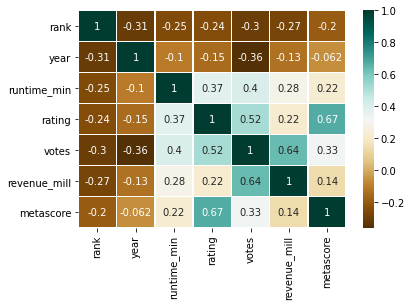

In [ ]:
movies_corr = movies.corr()
sns.heatmap(data = movies_corr, annot=True, linewidths=.5, cmap = 'BrBG')

This explains that:
* **User Rating** and **Critic Average Rating or Metascore** are highly correlated.
* **User votes** and **Revenue in millions** are highly correlated.
* **Rating** and **Votes** are highly correlated.
* **Year** and **Rank** are negatively correlated with all the other features.


<a id=section702></a>
### 7.2 Director Based Analysis

<a id=section70201></a>
### 7.2.1 Who are the top 20 directors directed more movies over the years?

In [ ]:
top_directors = (movies.groupby('director')['title'].count()).sort_values(ascending = False)
top_directors

director
Ridley Scott          8
David Yates           6
Michael Bay           6
Paul W.S. Anderson    6
Christopher Nolan     5
                     ..
Levan Gabriadze       1
Luca Guadagnino       1
Luke Greenfield       1
Luke Scott            1
Aamir Khan            1
Name: title, Length: 524, dtype: int64

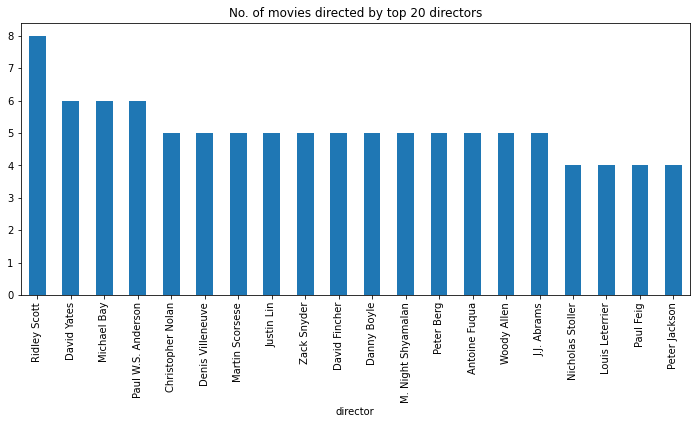

In [ ]:
top_directors[:20].plot(kind='bar', figsize=(12,5), title='No. of movies directed by top 20 directors')

* This explains that **RidleyScott**, **David Yates** and **Michael Bay** have directed greater number of movies over the given years in the dataset. 
* In the top 20 directors, lets see which director's movies have generated more revenue?

In [ ]:
# This dataframe gives the list of movies directed by the top 20 directors.
top_directors_movies = pd.DataFrame()
for director,v in top_directors[:21].items():
    top_directors_movies = top_directors_movies.append(movies[movies['director'].str.contains(director)],ignore_index=True)
top_directors_movies

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
0,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
1,103,The Martian,"Adventure,Drama,Sci-Fi",Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
2,388,Robin Hood,"Action,Adventure,Drama",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
3,471,American Gangster,"Biography,Crime,Drama",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
4,517,Exodus: Gods and Kings,"Action,Adventure,Drama",Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
...,...,...,...,...,...,...,...,...,...,...,...
101,613,The Lovely Bones,"Drama,Fantasy,Thriller",Peter Jackson,"Rachel Weisz, Mark Wahlberg, Saoirse Ronan, Su...",2009,135,6.7,130702,43.98,42.0
102,66,Kingsman: The Secret Service,"Action,Adventure,Comedy",Matthew Vaughn,"Colin Firth, Taron Egerton, Samuel L. Jackson,...",2014,129,7.7,440209,128.25,58.0
103,206,X: First Class,"Action,Adventure,Sci-Fi",Matthew Vaughn,"James McAvoy, Michael Fassbender, Jennifer Law...",2011,132,7.8,550011,146.41,65.0
104,220,Kick-Ass,"Action,Comedy",Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chloë Grac...",2010,117,7.7,456749,48.04,66.0


In [ ]:
# This datafrae gives the details of the average revenue generated by the top 20 directors
top_directors_revenue = top_directors_movies.groupby('director').mean()
top_directors_revenue = top_directors_revenue.drop(top_directors_revenue.columns.difference(['director','revenue_mill']), axis = 1)
top_directors_revenue = top_directors_revenue.sort_values('revenue_mill', ascending = True)
top_directors_revenue.reset_index(inplace=True)
top_directors_revenue = pd.merge(left = top_directors_revenue, right = top_directors, on = 'director')
top_directors_revenue

,director,revenue_mill,title
0,Woody Allen,28.238000,5
1,Paul W.S. Anderson,34.820000,6
2,Danny Boyle,36.680000,5
3,Denis Villeneuve,43.242000,5
4,M. Night Shyamalan,74.098000,5
5,Antoine Fuqua,78.642000,5
6,Nicholas Stoller,85.222500,4
7,Ridley Scott,89.882500,8
8,Matthew Vaughn,90.262500,4
9,Martin Scorsese,91.622000,5


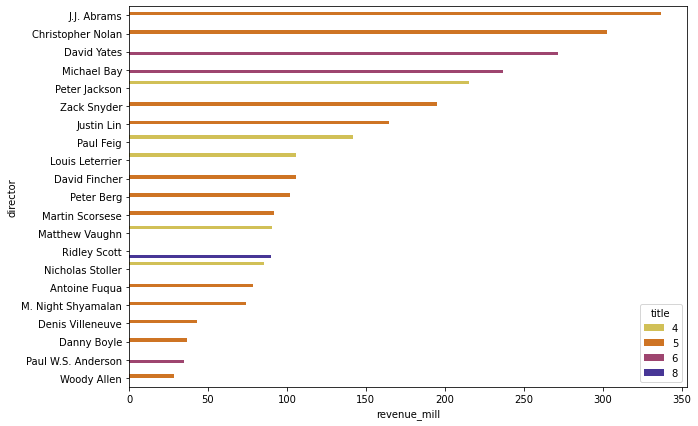

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y='director', x = 'revenue_mill', data=top_directors_revenue.sort_values(by='revenue_mill', ascending = False), color='Green', hue = 'title', palette='CMRmap_r')

* This explains that, **JJ Abrams** and **Christopher Nolan** have directed 5 movies over years which has fetched more revenue on board followed by **David Yates** and **Michael Bay** who have directed 6 movies.However **Ridley Scott** who have directed 8 movies have made a less revenue.
* Now lets further dig into movies revenue in details for the top 2 directors who have made more revenue.

In [ ]:
Dir_Abrams = top_directors_movies[top_directors_movies['director'].str.contains('J.J. Abrams')]

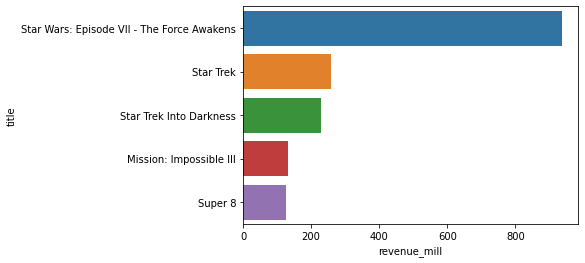

In [ ]:
sns.barplot(data = Dir_Abrams.sort_values(by='revenue_mill',ascending = False), y = 'title', x = 'revenue_mill')

In [ ]:
Dir_Chris = top_directors_movies[top_directors_movies['director'].str.contains('Christopher Nolan')]

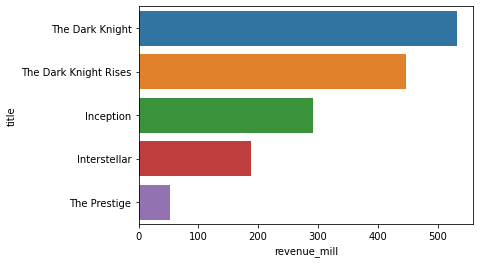

In [ ]:
sns.barplot(data = Dir_Chris.sort_values(by='revenue_mill',ascending = False), y = 'title', x = 'revenue_mill')

* This explains that, some movies directed by these top most directors have performed really well and has lead to high revenue whereas, we also find some of the movies that had lesser revenue in global media market.
* From the feature analysis, we found that the top 3 movies which were high on rating and top 4 movies which were high on uservotes were directed by **Christopher Nolan**
* We infer that, even though a movie is directed by a most popular high revenue producing director, it is not essential that the movie should result in high performance and revenue.

* From the feature analysis, we found that the top 3 movies which were high on rating were directed by **Christopher Nolan**
* From the feature analysis, we also found that the top 4 movies which were high on uservotes were directed by **Christopher Nolan**.

<a id=section703></a>
### 7.3 Year Based Analysis

<a id=section70201></a>
### 7.3.1 What are the number of movies over years?

In [ ]:
year_count = pd.DataFrame(movies.groupby('year')['title'].count().sort_values(ascending=False))
year_count.rename(columns = {'title': 'movie_count'}, inplace = True)
year_count.reset_index(inplace = True)
year_count

,year,movie_count
0,2016,198
1,2015,109
2,2014,93
3,2013,84
4,2012,62
5,2011,57
6,2010,57
7,2008,48
8,2009,45
9,2007,44


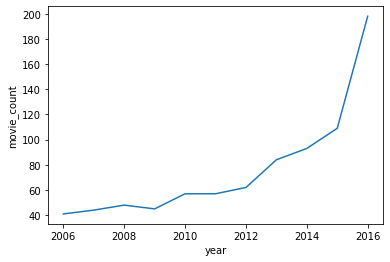

In [ ]:
sns.lineplot(data = year_count, x = 'year', y = 'movie_count')

This explains that:
* Trend is there are more number of movies getting released every year. 
* Maximum number of movies were released in year 2016.

<a id=section70201></a>
### 7.3.2 How revenue varies over years?

In [ ]:
year_rev = pd.DataFrame(movies.groupby(['year'])['revenue_mill'].mean()).sort_values(by = 'revenue_mill', ascending = False)
year_rev.reset_index(inplace = True)
year_rev

,year,revenue_mill
0,2009,115.742000
1,2012,110.103065
2,2010,105.081579
3,2008,97.525417
4,2011,93.703333
5,2007,93.074091
6,2013,88.084643
7,2006,87.255610
8,2014,85.433656
9,2015,80.725596


In [ ]:
year_rev_count = pd. merge(left = year_count, right= year_rev, on = 'year') 
year_rev_count = pd.DataFrame(year_rev_count)
year_rev_count

,year,movie_count,revenue_mill
0,2016,198,55.566111
1,2015,109,80.725596
2,2014,93,85.433656
3,2013,84,88.084643
4,2012,62,110.103065
5,2011,57,93.703333
6,2010,57,105.081579
7,2008,48,97.525417
8,2009,45,115.742000
9,2007,44,93.074091


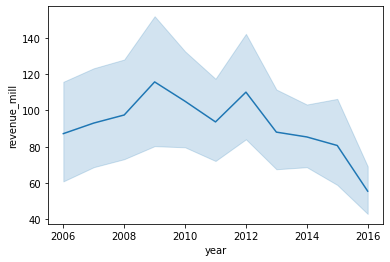

In [ ]:
sns.lineplot(data = movies, x = 'year', y = 'revenue_mill')

* This explains that, the average revenue was found to be high in the year 2009 followed by 2012, 2010.
* Even though 2016 had more number of movies, the average revenue was found to be the least.
* We infer that:
  * Number of movies doesnt imply that we would have a greater revenue
  * Public users are not satisfied even though number of released are high.

<a id=section70303></a>
### 7.3.3 How rating varies over years? 

In [ ]:
year_rate = pd.DataFrame(movies.groupby(['year'])['rating'].mean()).sort_values(by = 'rating', ascending = False)
year_rate.reset_index(inplace = True)
year_rate

,year,rating
0,2006,7.143902
1,2007,7.140909
2,2011,6.945614
3,2012,6.933871
4,2009,6.911111
5,2010,6.894737
6,2013,6.832143
7,2014,6.822581
8,2008,6.708333
9,2015,6.674312


In [ ]:
year_rate_count = pd.merge(left = year_rev_count, right = year_rate, on = 'year')
year_rate_count.sort_values(by = 'revenue_mill', ascending = False)

,year,movie_count,revenue_mill,rating
8,2009,45,115.742000,6.911111
4,2012,62,110.103065,6.933871
6,2010,57,105.081579,6.894737
7,2008,48,97.525417,6.708333
5,2011,57,93.703333,6.945614
9,2007,44,93.074091,7.140909
3,2013,84,88.084643,6.832143
10,2006,41,87.255610,7.143902
2,2014,93,85.433656,6.822581
1,2015,109,80.725596,6.674312


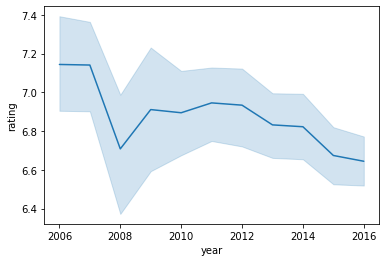

In [ ]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.lineplot(data = movies, x='year', y = 'rating')

* This explains that, in 2006, 2007 we have had the maximum average rating and after which the rating has been decreasing every year. This infers that, even though more number of movies are released every year, the performance of the movie and the likeliness of the public users have decreased.
* Lets see how the rating varies with revenue?

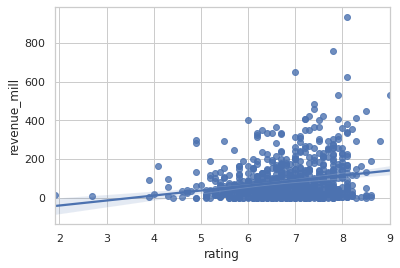

In [ ]:
sns.regplot(data = movies, x = 'rating', y = 'revenue_mill')

* This explains that, rating and revenue are positively correlated, Most of the movies rating are found between 5-8, and their respective revenue range between 1-200 but still the variation in revenue is relatively less for increase in rating.

<a id=section70303></a>
### 7.3.4 How user votes varies over years? 

In [ ]:
year_vote = pd.DataFrame(movies.groupby(['year'])['votes'].mean()).sort_values(by = 'votes', ascending = False)
year_vote.reset_index(inplace = True)
year_vote

,year,votes
0,2012,290861.483871
1,2006,277232.219512
2,2009,267180.577778
3,2008,266580.145833
4,2007,266530.704545
5,2010,261082.929825
6,2011,259254.736842
7,2013,225531.892857
8,2014,211926.881720
9,2015,129512.651376


In [ ]:
year_vote_count = pd.merge(left = year_rev_count, right = year_vote, on = 'year')
year_vote_count.sort_values(by = 'votes', ascending = False)

,year,movie_count,revenue_mill,votes
4,2012,62,110.103065,290861.483871
10,2006,41,87.255610,277232.219512
8,2009,45,115.742000,267180.577778
7,2008,48,97.525417,266580.145833
9,2007,44,93.074091,266530.704545
6,2010,57,105.081579,261082.929825
5,2011,57,93.703333,259254.736842
3,2013,84,88.084643,225531.892857
2,2014,93,85.433656,211926.881720
1,2015,109,80.725596,129512.651376


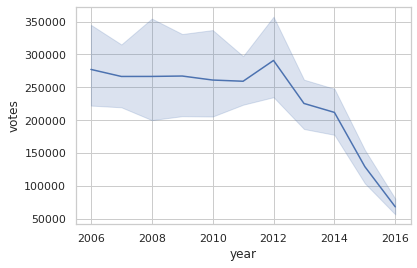

In [ ]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.lineplot(data = movies, x='year', y = 'votes')

* This explains that, from 2006-2012, the number of user votes were almost same, after the peak in 2012, the user votes have been decreasing over years. 
* We know that, every year more number of movies were released, but still people who are voting for a movie has highly decreased which means people are not satisfied with the performance. Mostly a user would not vote a movie if he/she did not like the movie.
* Lets see if decrease in votes affect the revenue?

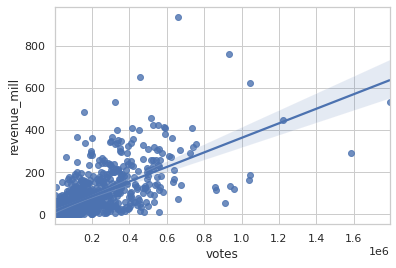

In [ ]:
sns.regplot(data = movies, x = 'votes', y = 'revenue_mill')

* This explains that, **User Votes** and **Revenue** are highly correlated. Movies with high number of user votes have actually performed well and fetched more revenue.



<a id=section70305></a>
### 7.3.5 Metascore variation over years? 


In [ ]:
year_ms = pd.DataFrame(movies.groupby(['year'])['metascore'].mean()).sort_values(by = 'metascore', ascending = False)
year_ms.reset_index(inplace = True)
year_ms

,year,metascore
0,2007,65.522727
1,2006,64.414634
2,2011,61.157895
3,2012,61.145161
4,2010,60.157895
5,2016,59.181818
6,2013,58.845238
7,2015,58.651376
8,2014,57.569892
9,2009,56.933333


In [ ]:
year_ms_count = pd.merge(left = year_rev_count, right = year_ms, on = 'year')
year_ms_count.sort_values(by = 'metascore', ascending = False)

,year,movie_count,revenue_mill,metascore
9,2007,44,93.074091,65.522727
10,2006,41,87.255610,64.414634
5,2011,57,93.703333,61.157895
4,2012,62,110.103065,61.145161
6,2010,57,105.081579,60.157895
0,2016,198,55.566111,59.181818
3,2013,84,88.084643,58.845238
1,2015,109,80.725596,58.651376
2,2014,93,85.433656,57.569892
8,2009,45,115.742000,56.933333


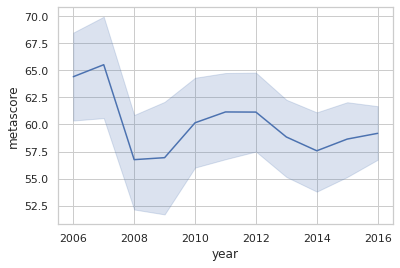

In [ ]:
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.lineplot(data = movies, x='year', y = 'metascore')

* This explains that **Metascore** values have been varying between 55-65 score and is found to be varying very less over years. 
* Lets see how metascore affects revenue?

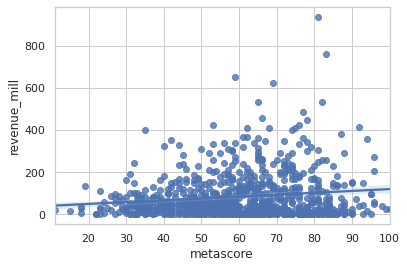

In [ ]:
sns.regplot(data = movies, x = 'metascore', y = 'revenue_mill')

* This explains that, variation in revenue is positive and very minimal with increase in metascore. 
* Mostly for a metascore ranging between 30-80, the revenue is found between range of 1- 200 million dollars.
* Its evident that, metascore doesnt change much of revenue value of a movie.
* Lets now see how the rating and metascore varies with eachother?

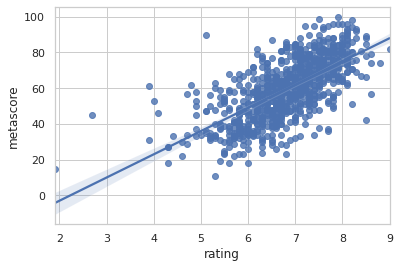

In [ ]:
sns.regplot(data = movies, x = 'rating', y = 'metascore')

This explains that, increase in user rating for a movie also has increase in critic scores

<a id=section704></a>
### 7.4 Genre Based Analysis

<a id=section70401></a>
### 7.4.1 How many movies under each genre?

In [ ]:
movie_genre_count = pd.DataFrame(movies_genre.groupby('genre')['title'].count().sort_values(ascending = False))
movie_genre_count.rename(columns = {'title': 'movie_count'}, inplace = True)
movie_genre_count.reset_index(inplace=True)
movie_genre_count

,genre,movie_count
0,Drama,419
1,Action,277
2,Comedy,250
3,Adventure,244
4,Thriller,148
5,Crime,126
6,Romance,120
7,Sci-Fi,107
8,Fantasy,92
9,Horror,87


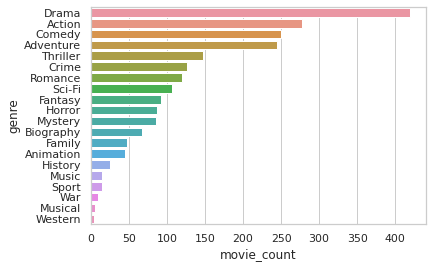

In [ ]:
sns.barplot(data = movie_genre_count, y = 'genre', x = 'movie_count')

This explains that **Drama**, **Action**, **Comedy** and **Adventure** are the top 4 genre's over years.

<a id=section70402></a>
### 7.4.2 How revenue varies for various genre's?

In [ ]:
movie_genre_rev = pd.DataFrame((movies_genre.groupby('genre')['revenue_mill'].mean()).sort_values(ascending = False))
movie_genre_rev.reset_index(inplace=True)
movie_genre_rev

,genre,revenue_mill
0,Animation,192.359556
1,Adventure,157.160041
2,Sci-Fi,137.454860
3,Fantasy,133.052065
4,Action,127.089928
5,Family,124.141667
6,Western,117.457500
7,Musical,81.642000
8,Comedy,76.952520
9,Thriller,70.749324


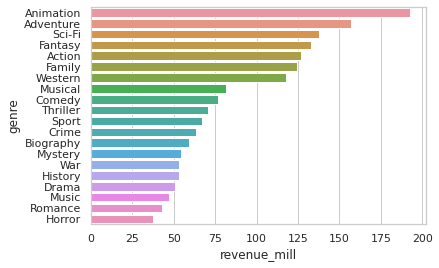

In [ ]:
sns.barplot(data = movie_genre_rev, y = 'genre', x = 'revenue_mill')

This explains that **Animation**, **Adventure**,**Sci Fi** and **Fantasy** are the top 4 genre's that have produced high revenue's in the media industry.

In [ ]:
movie_gcr = pd. merge(left = movie_genre_count, right = movie_genre_rev, on = 'genre').sort_values(by = 'revenue_mill', ascending = False)
movie_gcr.reset_index(inplace = True)
movie_gcr

,index,genre,movie_count,revenue_mill
0,13,Animation,45,192.359556
1,3,Adventure,244,157.160041
2,7,Sci-Fi,107,137.454860
3,8,Fantasy,92,133.052065
4,1,Action,277,127.089928
5,12,Family,48,124.141667
6,19,Western,4,117.457500
7,18,Musical,5,81.642000
8,2,Comedy,250,76.952520
9,4,Thriller,148,70.749324


* This explains that, more number of movies in a particular genre does not imply there will be more revenue.
* In revenue analysis, we had seen that 2009,2012 and 2010 have had high revenue respectively. Lets see which genre's have contributed more in 2009.

In [ ]:
movies_2009 = movies_genre[movies_genre['year']==2009].groupby('genre')['revenue_mill'].mean().sort_values(ascending = False)
a = movies_genre[movies_genre['year']==2009].groupby('genre')['title'].count().sort_values(ascending = False)
movies_2009 = pd.merge(left = movies_2009, right = a, on = 'genre')
movies_2009.rename(columns={'title':'movie_count'})

,revenue_mill,movie_count
genre,,
Sport,255.950000,1
Action,192.460000,14
Adventure,190.002941,17
Sci-Fi,182.371429,7
Fantasy,177.795714,7
Family,147.130000,3
Biography,129.940000,3
Animation,123.407500,4
War,120.520000,1


In [ ]:
d = movies_genre[movies_genre['year']==2009]
d[d['genre']=='Sport']

,rank,title,genre,director,actors,year,runtime_min,rating,votes,revenue_mill,metascore
736,311,The Blind Side,Sport,John Lee Hancock,"Quinton Aaron, Sandra Bullock, Tim McGraw,Jae ...",2009,129,7.7,237221,255.95,53.0


* In 2009 year, **The Blind Side** a sport genre movie alone has contributed about 255 million dollars.

<a id=section70402></a>
### 7.4.3 What is the trend in genre over years?

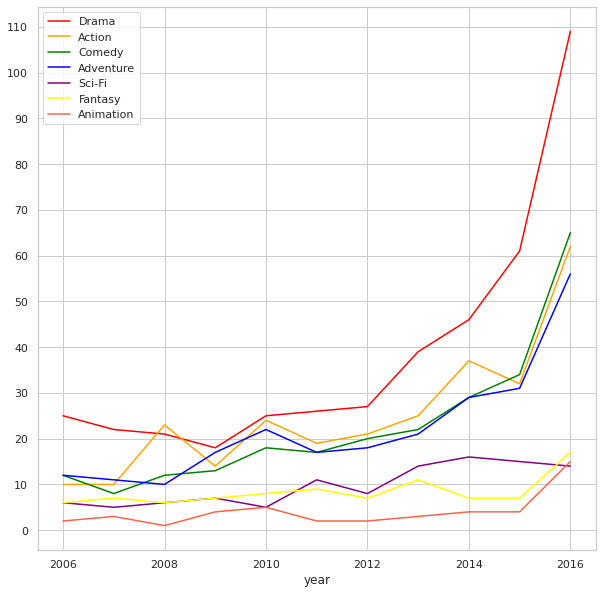

In [ ]:
plt.figure(figsize=(10,10))
movies_genre[movies_genre['genre']=='Drama'].groupby('year')['title'].count().plot(kind = 'line', color = 'red', yticks = np.arange(0,120, 10))
movies_genre[movies_genre['genre']=='Action'].groupby('year')['title'].count().plot(kind = 'line', color = 'orange', yticks = np.arange(0,120, 10))
movies_genre[movies_genre['genre']=='Comedy'].groupby('year')['title'].count().plot(kind = 'line', color = 'green',yticks = np.arange(0,120, 10))
movies_genre[movies_genre['genre']=='Adventure'].groupby('year')['title'].count().plot(kind = 'line', color = 'blue', yticks = np.arange(0,120, 10))
movies_genre[movies_genre['genre']=='Sci-Fi'].groupby('year')['title'].count().plot(kind = 'line', color = 'purple', yticks = np.arange(0,120, 10))
movies_genre[movies_genre['genre']=='Fantasy'].groupby('year')['title'].count().plot(kind = 'line', color = 'yellow', yticks = np.arange(0,120, 10))
movies_genre[movies_genre['genre']=='Animation'].groupby('year')['title'].count().plot(kind = 'line', color = 'tomato', yticks = np.arange(0,120, 10))
plt.legend(labels = ('Drama', 'Action', 'Comedy', 'Adventure','Sci-Fi','Fantasy','Animation'))
plt.show()

This explains the trend of the top 4 genre's over years:
* **Drama** movies have seen a decrease in release from 2006-2009, post which every year we find increase in number of drama genre movies.
* **Action**, **Comedy** and **Adventure** have  seen increase in movies from 2013.
* **Animation**, **Fantasy** and **Sci-Fi** movies are more or less the same numbers over 10 years.

<a id=section70403></a>
### 7.4.4 What is the high rated genre over years?

In [ ]:
genre_rate = movies_genre.groupby('genre')['rating'].mean().sort_values(ascending = False)
genre_vote = movies_genre.groupby('genre')['votes'].mean().round(1).sort_values(ascending = False)
genre_vote_rate = pd.merge(left = genre_rate, right = genre_vote,on = 'genre')
genre_vote_rate = pd.merge(left = genre_vote_rate, right= movie_genre_count, on = 'genre')
genre_vote_rate.sort_values(by = 'votes', ascending = False)

,genre,rating,votes,movie_count
4,Western,7.250000,390412.8,4
13,Sci-Fi,6.768224,317911.3,107
0,War,7.600000,292591.0,10
11,Adventure,6.797951,266497.9,244
17,Action,6.650903,250533.2,277
18,Fantasy,6.630435,231953.9,92
8,Mystery,6.968605,208712.5,86
3,Animation,7.311111,207999.6,45
10,Crime,6.900794,204617.6,126
12,Thriller,6.792568,199899.8,148


* This explains that high rating has ben given for movies of genre **War**, **Biography**, **Animation** .
* **Western** and **Musical** movies are released in less numbers over years but still they have got a high rating. **Wastern** genre movies have got the maximum number of votes of all the other genre's.
*Lets see how votes and rating are correlated?


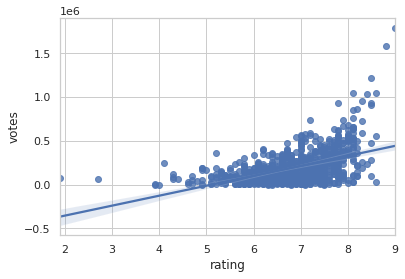

In [ ]:
sns.regplot(data = movies, y = 'votes', x = 'rating')

This explains that maximum movie rating lies between 5-8, and as the number of votes increases, the rating also hsa increased.

<a id=section704></a>
### 7.4 Actors Based Analysis

<a id=section70401></a>
### 7.4.1 Which actor has acted more in movies over 10 years?

In [ ]:
top_actors_count = pd.DataFrame(movies_actors.groupby('actors')['title'].count().sort_values(ascending = False))
top_actors_count.reset_index(inplace=True)
top_actors_count.rename(columns = {'title':'movie_count'}, inplace=True)
top_actors_count

,actors,movie_count
0,Mark Wahlberg,15
1,Hugh Jackman,14
2,Brad Pitt,13
3,Scarlett Johansson,12
4,Robert Downey Jr.,12
...,...,...
1633,Lily Cole,1
1634,Lily Rabe,1
1635,Lin Shaye,1
1636,Linda Gegusch,1


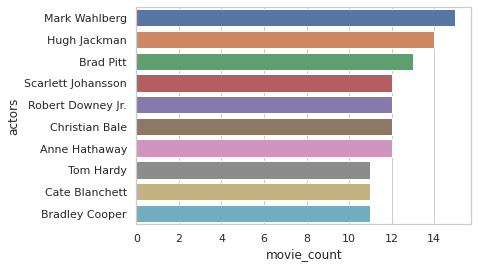

In [ ]:
sns.barplot(data = top_actors_count[0:10], y = 'actors', x = 'movie_count')

This explains that **Mark Wahlberg** and **Christian Bale** are the top actors who have acted in more movies. Now lets dig a little more and see the revenue generted by movies with these top actors.

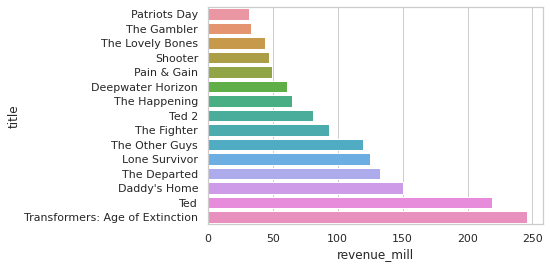

In [ ]:
sns.barplot(data = movies_actors[movies_actors['actors'].str.contains('Mark Wahlberg')].sort_values(by = 'revenue_mill', ascending=True), x = 'revenue_mill', y = 'title')

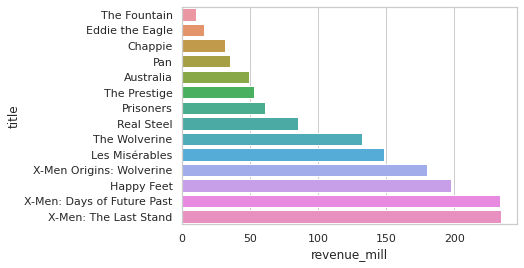

In [ ]:
sns.barplot(data = movies_actors[movies_actors['actors'].str.contains('Hugh Jackman')].sort_values(by = 'revenue_mill', ascending=True), x = 'revenue_mill', y = 'title')

<a id=section70402></a>
### 7.4.2 Which actor's movies has made more revenue over years?

In [ ]:
top_actors_rev = pd.DataFrame(movies_actors.groupby('actors')['revenue_mill'].mean().sort_values(ascending = False))
top_actors_rev.reset_index(inplace=True)
top_actors_rev = pd.merge(left = top_actors_rev, right = top_actors_count, on = 'actors')
top_actors_rev

,actors,revenue_mill,movie_count
0,Daisy Ridley,936.63,1
1,John Boyega,936.63,1
2,Donnie Yen,532.17,1
3,Alan Tudyk,532.17,1
4,Ed O'Neill,486.29,1
...,...,...,...
1633,Cary Joji Fukunaga,0.01,1
1634,Jason O'Mara,0.01,1
1635,Callum Keith Rennie,0.01,1
1636,Christian Cooke,0.01,1


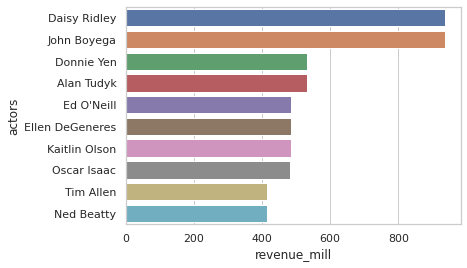

In [ ]:
sns.barplot(data = top_actors_rev[0:10], y = 'actors', x = 'revenue_mill')

* This explains that **Daisy Ridley** and **John Boyega** are the top actors who have acted in movies which produced more revenue. 

* From all the above graphs we infer that, even though the actors have acted in any movies, not all of their movies have performed well and have had good revenue.So its evident that, top actors need not have always high revenue.

<a id=section705></a>
### 7.5 Duration Based Analysis

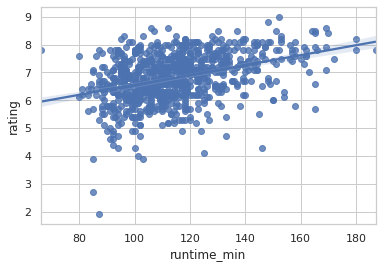

In [ ]:
sns.regplot(data = movies, x = 'runtime_min', y = 'rating')

This explains that, increase in runtime, has increase in rating of a movie, but however movies more than 160 min i.e 2.5 hours have less number of ratings. People rate the movie only if they like it, we infer that movies greater then 2.5 hours people are bored and not rating them.

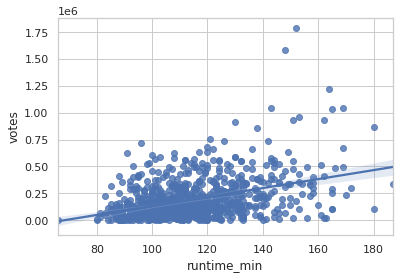

In [ ]:
sns.regplot(data = movies, x = 'runtime_min', y = 'votes')

Similarly, we see that people have voted more for movies less than 2.5 hours.

<a id=section8></a> 
### 8. Conclusion

* Using pandas profilingreport, we standardized the columns, removed the missing data, split the data on different genre's, split the data on different actors, striped the data to avoid any spaces.
*  **Feature based analysis**: We saw the top 10 movies with respect to count, rating, votes, meatscore , duration and revenue. We infer that IMDB rank varies with that of the average user rating of a movie. The high rated and high voted top movies are directed by Christopher Nolan.
* **Director based anlysis**: We infer that, a director giving more number of movies doesnt imply leads to more revenue and a director giving more revenue doesnt imply that all his/her movies would lead to more revenue, there may also be some movies which has not performed well.
* **Year based analysis**: We infer that-
  * More number of movies were released as year progressed,  but with fall in revenue, rating, votes and critic score.
  * More number of movies doesnt imply that we will have a greater revenue.
  * More movies and lesser revenue implies public users are not satisfied with the movies and hence their rating and vote count has decreased.
  * The performance and quality of movie has decresed over years.
* **Rating analysis**: We infer that-
  * Both users and critics have almost same opiion about a movie.
  * As the number of votes increases for a movie the rating also has increased which means that the movie has performed well.
* **Genre based analysis**: We infer that-
  * More number f movies with Drama and action genre were released but however, Animation and Adventure genre movies fetch more revenue.
  * From the genre trends of evert year, we see that mostly the directors prefer to take action, comedy and adventure movies more than others.
  * Even tthough War, Biography movies are highly rated, the number of people who has watched the movie/voted is less which means only a lesser crowd likes such kid of movies.
  * Animation genre movies are highly rated as well as gives more revenue which is evident that users likes more of animated movies.
* **Actors based analysis**: We infer that-
  * Even though an actor has acted in more movies, it doesnt imply that it would lead in high revenue.
  * Even though an actor has given movies with more revenue, there were some which have not performed well
* **Duration based analysis**: We infer that-
  * People are getting bored and are voting less / rating less for movies greater than 2 and half hours.






Overall, I can confirm that:
  * In a business perspective- film industry has grown up over years in producing different genre of movies and more number of movies.
  * In Public perspective- Users vote high and rate high for movies which satifies them which leads to more revenue.